In [15]:
import pandas as pd

In [2]:
#reading in the tv show files and adding them to one data frame together
amazon_tv = pd.read_csv("./AmazonTvShows.csv")
hulu_tv = pd.read_csv('./Hulu_tv_shows.csv')
netflix_tv = pd.read_csv('netflix_tv.csv')
disneyplus_tv = pd.read_csv('disneyplus_tv.csv')
hulu_tv

,Unnamed: 0,type,title,date_added,release_year,rating,duration,listed_in,streaming_platform
0,8,TV Show,Queens,"October 20, 2021",2021,TV-14,1,"Drama, Music",Hulu
1,9,TV Show,The Bachelorette,"October 20, 2021",2003,TV-14,3,"Reality, Romance",Hulu
2,14,TV Show,Home Sweet Home,"October 16, 2021",2021,TV-PG,1,Reality,Hulu
3,16,TV Show,Showtime Championship Boxing: Wilder vs. Molina,"October 16, 2021",2015,TV-14,1,Sports,Hulu
4,17,TV Show,America's Book of Secrets,"October 15, 2021",2012,TV-14,1,"Documentaries, History",Hulu
...,...,...,...,...,...,...,...,...,...
1326,3040,TV Show,Heroic Age,"August 14, 2009",2007,TV-PG,1,"Action, Adventure, Anime",Hulu
1327,3041,TV Show,Black Blood Brothers,"February 10, 2009",2006,TV-MA,1,"Action, Adventure, Anime",Hulu
1328,3042,TV Show,"Doogie Howser, M.D.","July 1, 2008",1989,TV-PG,4,"Comedy, Drama, Family",Hulu
1329,3043,TV Show,Lost in Space,"June 1, 2008",1965,TV-G,3,"Action, Adventure, Classics",Hulu


In [3]:
#removing unnamed column which seems to be reference to old index values for each value
amazon_tv = amazon_tv.drop(columns="Unnamed: 0")
hulu_tv = hulu_tv.drop(columns="Unnamed: 0")
netflix_tv = netflix_tv.drop(columns="Unnamed: 0")
disneyplus_tv = disneyplus_tv.drop(columns="Unnamed: 0")


In [4]:
#renaming a few columns to be the same and dropping the old columns to easily merge dataframes
hulu_tv['duration_seasons'] = hulu_tv['duration']
netflix_tv['duration_seasons'] = netflix_tv['duration_season']
disneyplus_tv['duration_seasons'] = disneyplus_tv['duration_season']

hulu_tv = hulu_tv.drop(columns="duration")
netflix_tv = netflix_tv.drop(columns="duration_season")
disneyplus_tv = disneyplus_tv.drop(columns="duration_season")

In [5]:
#joining all the tv dataframes together under one dataframe
tv_df = pd.concat([amazon_tv, hulu_tv,netflix_tv,disneyplus_tv], axis=0)

tv_df

,type,title,release_year,rating,listed_in,streaming_platform,duration_seasons,date_added
0,TV Show,Wipeout Canada,2011,ALL,"Comedy, Documentary, Unscripted",Amazon Prime,1,NaN
1,TV Show,Zoo Babies,2008,ALL,"Kids, Special Interest",Amazon Prime,1,NaN
2,TV Show,Zoë Coombs Marr: Bossy Bottom,2020,18+,"Comedy, Talk Show and Variety",Amazon Prime,1,NaN
3,TV Show,Zoboomafoo,2001,TV-Y,Kids,Amazon Prime,1,NaN
4,TV Show,Zo Zo Zombie: Mini-Series,2020,TV-Y7,"Action, Anime, Comedy",Amazon Prime,1,NaN
...,...,...,...,...,...,...,...,...
391,TV Show,X-Men: Evolution,2000,TV-Y7,"Action-Adventure, Animation, Kids",DisneyPlus,4,"November 12, 2019"
392,TV Show,Smart Guy,1996,TV-G,"Comedy, Coming of Age, Kids",DisneyPlus,3,"October 1, 2019"
393,TV Show,Disney Kirby Buckets,2014,TV-Y7,"Action-Adventure, Comedy, Coming of Age",DisneyPlus,3,"November 12, 2019"
394,TV Show,Disney Mech-X4,2016,TV-Y7,"Action-Adventure, Comedy, Science Fiction",DisneyPlus,2,"November 12, 2019"


In [81]:
#functions to create columns for genres
def action(listed):
    if 'Action' in listed:
        return 1
    else:
        return 0

def comedy(listed):
    if 'Comed' in listed:
        return 1
    else:
        return 0
    
def drama(listed):
    if 'Drama' in listed:
        return 1
    else:
        return 0
    
def family_kids(listed):
    if 'Kids' in listed:
        return 1
    elif 'Family' in listed:
        return 1
    else:
        return 0
def romance(listed):
    if 'Roman' in listed:
        return 1
    else:
        return 0  
def music(listed):
    if 'Music' in listed:
        return 1
    else:
        return 0 
def thriller(listed):
    if 'Thriller' in listed:
        return 1
    else:
        return 0 
def faith_spiritually(listed):
    if 'Faith' in listed:
        return 1
    else:
        return 0 
def documentary(listed):
    if 'Document' in listed:
        return 1
    else:
        return 0
def sci_fi_fantasy(listed):
    if 'Sci' in listed:
        return 1
    elif 'Fantasy' in listed:
        return 1
    else:
        return 0
    
def lgbtq(listed):
    if 'LGBTQ' in listed:
        return 1
    else:
        return 0
def black_stories(listed):
    if 'Black' in listed:
        return 1 
    else:
        return 0
def cooking_food(listed):
    if ("Cooking"  or "Food") in listed:
        return 1
    else:
        return 0
def reality(listed):
    if 'Reality' in listed:
        return 1
    else:
        return 0 
def sports(listed):
    if 'Sports' in listed:
        return 1
    else:
        return 0  
def anime(listed):
    if 'Anime' in listed:
        return 1
    else:
        return 0  


In [86]:
#applying categories to the tv dataframe for use in powerbi
tv_df['action'] = tv_df['listed_in'].apply(action)
tv_df['comedy'] = tv_df['listed_in'].apply(comedy)
tv_df['drama'] = tv_df['listed_in'].apply(drama)
tv_df['family_kids'] = tv_df['listed_in'].apply(family_kids)
tv_df['romance'] = tv_df['listed_in'].apply(romance)
tv_df['music'] = tv_df['listed_in'].apply(music)
tv_df['thriller'] = tv_df['listed_in'].apply(thriller)
tv_df['faith_spiritually'] = tv_df['listed_in'].apply(faith_spiritually)
tv_df['documentary'] = tv_df['listed_in'].apply(documentary)
tv_df['sci_fi_fantasy'] = tv_df['listed_in'].apply(sci_fi_fantasy)
tv_df['lgbtq'] = tv_df['listed_in'].apply(lgbtq)
tv_df['black_stories'] = tv_df['listed_in'].apply(black_stories)
tv_df['cooking_food'] = tv_df['listed_in'].apply(cooking_food)
tv_df['reality'] = tv_df['listed_in'].apply(reality)
tv_df['sports'] = tv_df['listed_in'].apply(sports)
tv_df['anime'] = tv_df['listed_in'].apply(anime)

In [87]:
#applying categories to the movies dataframe for use in powerbi
movies_df['action'] = movies_df['listed_in'].apply(action)
movies_df['comedy'] = movies_df['listed_in'].apply(comedy)
movies_df['drama'] = movies_df['listed_in'].apply(drama)
movies_df['family_kids'] = movies_df['listed_in'].apply(family_kids)
movies_df['romance'] = movies_df['listed_in'].apply(romance)
movies_df['music'] = movies_df['listed_in'].apply(music)
movies_df['thriller'] = movies_df['listed_in'].apply(thriller)
movies_df['faith_spiritually'] = movies_df['listed_in'].apply(faith_spiritually)
movies_df['documentary'] = movies_df['listed_in'].apply(documentary)
movies_df['sci_fi_fantasy'] = movies_df['listed_in'].apply(sci_fi_fantasy)
movies_df['lgbtq'] = movies_df['listed_in'].apply(lgbtq)
movies_df['black_stories'] = movies_df['listed_in'].apply(black_stories)
movies_df['cooking_food'] = movies_df['listed_in'].apply(cooking_food)
movies_df['sports'] = movies_df['listed_in'].apply(sports)
movies_df['anime'] = movies_df['listed_in'].apply(anime)

/var/folders/nk/89000lgj3x51vf5d_cwf7p580000gn/T/ipykernel_81414/1103547279.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['action'] = movies_df['listed_in'].apply(action)
/var/folders/nk/89000lgj3x51vf5d_cwf7p580000gn/T/ipykernel_81414/1103547279.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['comedy'] = movies_df['listed_in'].apply(comedy)
/var/folders/nk/89000lgj3x51vf5d_cwf7p580000gn/T/ipykernel_81414/1103547279.py:4: SettingWithCopyWarning: 
A value is trying to be set on 

In [6]:
#reading in the movie files and adding them to one data frame together
amazon_movies = pd.read_csv("./AmazonMovies.csv")
hulu_movies = pd.read_csv('./Hulu_movies.csv')
netflix_movies = pd.read_csv('netflix_movies.csv')
disneyplus_movies = pd.read_csv('disneyplus_movies.csv')


In [7]:
#removing unnamed column which seems to be reference to old index values for each value
amazon_movies = amazon_movies.drop(columns="Unnamed: 0")
hulu_movies = hulu_movies.drop(columns="Unnamed: 0")
netflix_movies = netflix_movies.drop(columns="Unnamed: 0")
disneyplus_movies = disneyplus_movies.drop(columns="Unnamed: 0")




In [12]:
#renaming a column to be the same and dropping the old column to easily merge dataframes
hulu_movies['duration_minutes'] = hulu_movies['duration']
hulu_movies = hulu_movies.drop(columns='duration')
hulu_movies

,type,title,date_added,release_year,rating,listed_in,streaming_platform,duration_minutes
0,Movie,Ricky Velez: Here's Everything,"October 24, 2021",2021,TV-MA,"Comedy, Stand Up",Hulu,96.501215
1,Movie,The Marksman,"October 23, 2021",2021,PG-13,"Action, Thriller",Hulu,108.000000
2,Movie,Gaia,"October 22, 2021",2021,R,Horror,Hulu,97.000000
3,Movie,Dream Horse,"October 18, 2021",2020,PG,"Comedy, Drama",Hulu,113.000000
4,Movie,Cheer Camp Killer,"October 15, 2021",2020,TV-14,Thriller,Hulu,87.000000
...,...,...,...,...,...,...,...,...
897,Movie,Dr. Seuss: The Cat in the Hat,"April 25, 2014",1971,TV-G,"Family, Kids",Hulu,25.000000
898,Movie,Sabrina Down Under,"April 25, 2014",1999,TV-G,"Comedy, Family, Teen",Hulu,87.000000
899,Movie,Snoopy Come Home,"April 25, 2014",1972,TV-G,"Comedy, Family, Kids",Hulu,81.000000
900,Movie,Dr. Seuss: The Lorax,"April 18, 2014",1972,TV-G,"Family, Kids",Hulu,26.000000


In [13]:
#joining all the movie dataframes together under one dataframe
movies_df = pd.concat([amazon_movies, hulu_movies,netflix_movies,disneyplus_movies], axis=0)

movies_df

,type,title,release_year,rating,listed_in,streaming_platform,duration_minutes,date_added
0,Movie,Take Care Good Night,2018,13+,"Drama, International",Amazon Prime,110.0,NaN
1,Movie,Zoombies,2016,13+,"Horror, Science Fiction",Amazon Prime,87.0,NaN
2,Movie,Zoe,2018,R,Science Fiction,Amazon Prime,104.0,NaN
3,Movie,Zis Boom Bah,1941,NR,"Arts, Entertainment, and Culture, Comedy, Drama",Amazon Prime,62.0,NaN
4,Movie,Zandalee,1991,R,Drama,Amazon Prime,94.0,NaN
...,...,...,...,...,...,...,...,...
1046,Movie,X-Men Origins: Wolverine,2009,PG-13,"Action-Adventure, Family, Science Fiction",DisneyPlus,108.0,"June 4, 2021"
1047,Movie,Night at the Museum: Battle of the Smithsonian,2009,PG,"Action-Adventure, Comedy, Family",DisneyPlus,106.0,"April 2, 2021"
1048,Movie,Eddie the Eagle,2016,PG-13,"Biographical, Comedy, Drama",DisneyPlus,107.0,"December 18, 2020"
1049,Movie,Bend It Like Beckham,2003,PG-13,"Buddy, Comedy, Coming of Age",DisneyPlus,112.0,"September 18, 2020"


In [14]:
tv_df.to_csv('tv_shows.csv', index=False)
movies_df.to_csv('movies.csv', index=False)



In [24]:
#removing outliers that where note previously removed
Q1 = movies_df['duration_minutes'].quantile(0.25)
Q3 = movies_df['duration_minutes'].quantile(0.75)
IQR = Q3 - Q1

# Determine outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers in 'duration_minutes'
movies_df = movies_df[(movies_df['duration_minutes'] >= lower_bound) & (movies_df['duration_minutes'] <= upper_bound)]

In [25]:
#visualizations

import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
#descriptive statistics
print(movies_df.groupby('streaming_platform')['release_year'].mean())
print(movies_df.groupby('streaming_platform')['release_year'].median())
print(movies_df.groupby('streaming_platform')['release_year'].mode())

streaming_platform
Amazon Prime    2005.958769
DisneyPlus      2002.769614
Hulu            2010.914773
Netflix         2013.472508
Name: release_year, dtype: float64
streaming_platform
Amazon Prime    2015.0
DisneyPlus      2007.0
Hulu            2016.0
Netflix         2016.0
Name: release_year, dtype: float64


AttributeError: 'SeriesGroupBy' object has no attribute 'mode'

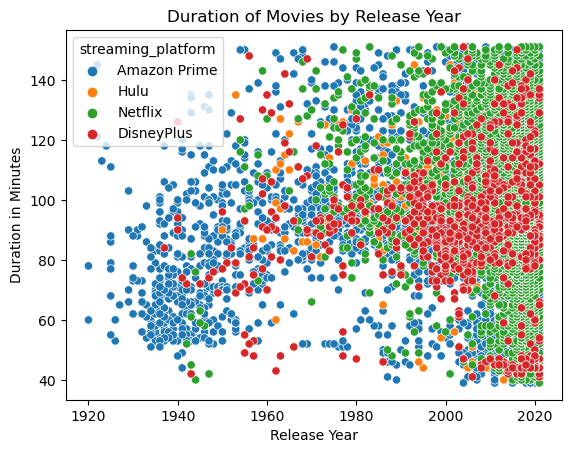

In [54]:

sns.scatterplot(data=movies_df, x='release_year', y = 'duration_minutes', hue = 'streaming_platform')

plt.xlabel('Release Year')
plt.ylabel('Duration in Minutes')
plt.title('Duration of Movies by Release Year')

plt.show()

In [29]:
import statsmodels.api as sm


In [31]:
x = movies_df['release_year']
y = movies_df['duration_minutes']
x = sm.add_constant(x)

# Fit the regression model
model = sm.OLS(y, x).fit()

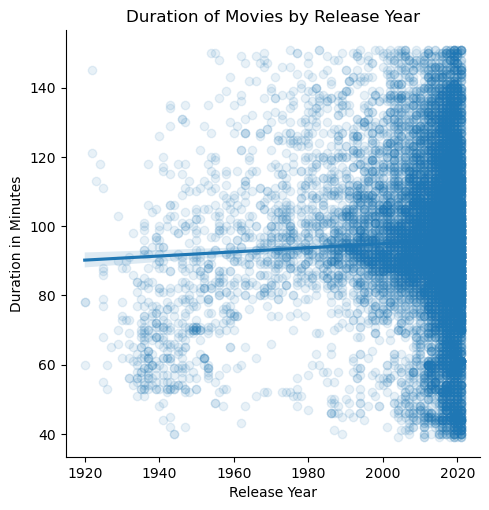

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       duration_minutes   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     28.22
Date:                Wed, 05 Jun 2024   Prob (F-statistic):           1.10e-07
Time:                        10:48:58   Log-Likelihood:                -63934.
No. Observations:               14106   AIC:                         1.279e+05
Df Residuals:                   14104   BIC:                         1.279e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -23.8863     22.471     -1.063      0.288     -67.932      20.159
release_year     0.0594      0.011      5.312      0.000       0.037       0.081
==============================================================================
Omnibus:                       13.992   Durbin-Watson:                   1.045
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.298
Skew:                          -0.063   Prob(JB):                     0.000785
Kurtosis:                       3.093   Cond. No.                     2.38e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
sns.lmplot(x='release_year',y= 'duration_minutes', data=movies_df, scatter_kws = {'alpha' : 0.1})
plt.xlabel('Release Year')
plt.ylabel('Duration in Minutes')
plt.title('Duration of Movies by Release Year')
plt.show()
model.summary()

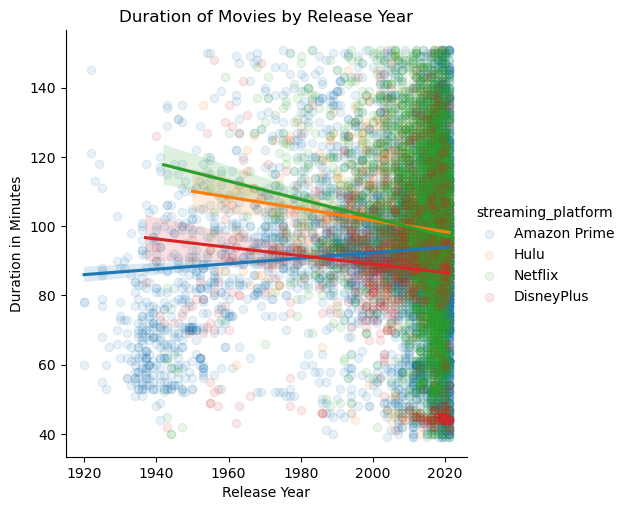

In [52]:
sns.lmplot(x='release_year',y= 'duration_minutes', data=movies_df, hue= 'streaming_platform',scatter_kws = {'alpha' : 0.1})
plt.xlabel('Release Year')
plt.ylabel('Duration in Minutes')
plt.title('Duration of Movies by Release Year')
plt.show()

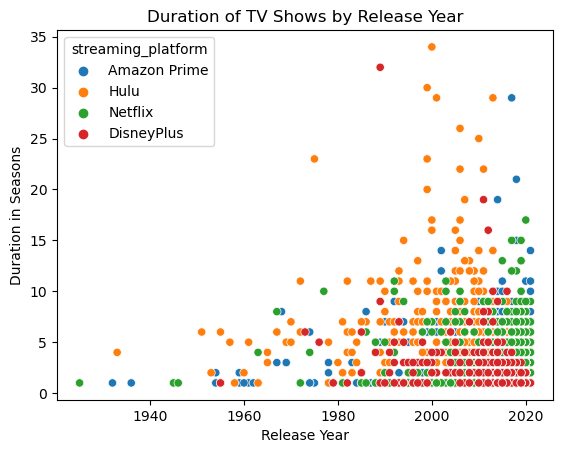

In [59]:
sns.scatterplot(data=tv_df, x='release_year', y = 'duration_seasons', hue = 'streaming_platform')

plt.xlabel('Release Year')
plt.ylabel('Duration in Seasons')
plt.title('Duration of TV Shows by Release Year')

plt.show()

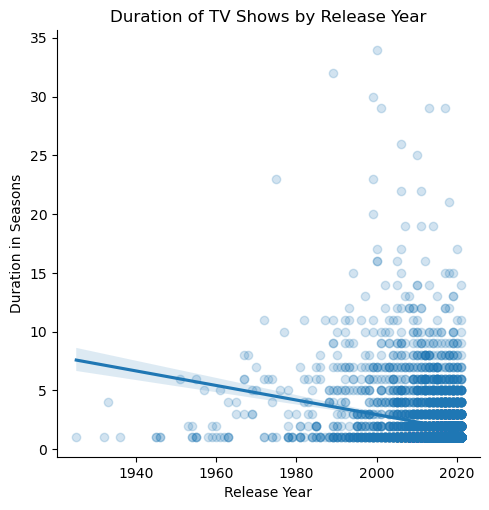

In [60]:
sns.lmplot(x='release_year',y= 'duration_seasons', data=tv_df, scatter_kws = {'alpha' : 0.2})
plt.xlabel('Release Year')
plt.ylabel('Duration in Seasons')
plt.title('Duration of TV Shows by Release Year')
plt.show()

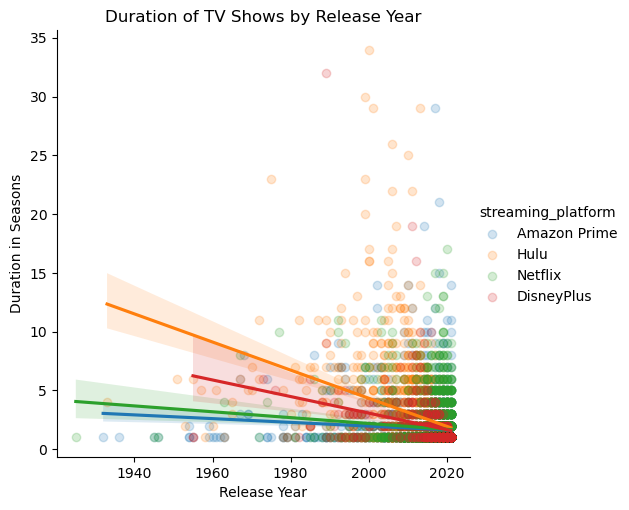

In [61]:
sns.lmplot(x='release_year',y= 'duration_seasons', data=tv_df, scatter_kws = {'alpha' : 0.2}, hue = 'streaming_platform')
plt.xlabel('Release Year')
plt.ylabel('Duration in Seasons')
plt.title('Duration of TV Shows by Release Year')
plt.show()